##### Business Case : Create a report stating the performance of multiple models on this data and suggest the best model for production.

### Domain Analysis :
* battery_power - Total energy a battery can store in one time measured in mAh
* blue - Has bluetooth or not
* clock_speed - speed at which microprocessor executes instructions
* dual_sim - Has dual sim support or not
* fc - Front Camera mega pixels
* four_g - Has 4G or not
* int_memory - Internal Memory in Gigabytes
* m_dep - Mobile Depth in cm
* mobile_wt - Weight of mobile phone
* n_cores - Number of cores of processor
* pc - Primary Camera mega pixels
* px_height - Pixel Resolution Height
* px_width - Pixel Resolution Width
* ram - Random Access Memory in Megabytes
* sc_h - Screen Height of mobile in cm
* sc_w - Screen Width of mobile in cm
* talk_time - longest time that a single battery charge will last when you are
* three_g - Has 3G or not
* touch_screen - Has touch screen or not
* wifi - Has wifi or not
* price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
data = pd.read_csv('datasets_11167_15520_train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
data.shape

(2000, 21)

#### Insights:
* There are 2000 rows & 21 columns
* This is a Multi-class classification

### Exploratory Data Analysis
 Task 1:-Prepare a complete data analysis report on the given data.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Insights:
* This is a numerical data all the datatypes of features are int and float datatype 

In [8]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### Insights:
* Here standard deviation is not 0 anywhere
* There are no 0 values for ths feature

### Data Visualization

#### Univariate Analysis

In [11]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Insights:
* There are many features have the distinct values which is 0 & 1
* for battery_power total max energy is 1998 and min can store is 501 in mAh
* for bluetooth there are most are the mobiles does not(0) have the bluetooth actually it's a 50%(yes) - 50%(not)
* for dual_sim there are max supports(1) the dual sims
* front camera is completely in right skewed form
* for 4g most of are the 4g(1)
* Internal memory is max 64.0 and min 2.0
* mobile weight is max 200 and min 80
* pixel camera is max 20.0, height and weight is max nearly 2k
* ram is max 3998 and min 256 which is good
* talk time is max 20.0 will last 
* for 3g yes(1) max its 3g
* for touch screen its 50%(yes) - 50%(no)
* max mobiles have(1) wifi
* for price range which is target variable, 0(low cost)-25%, 1(medium cost)=25%, 2(high cost)=25% and 3(very high cost)=25%.

#### Bivariate Analysis 

In [9]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


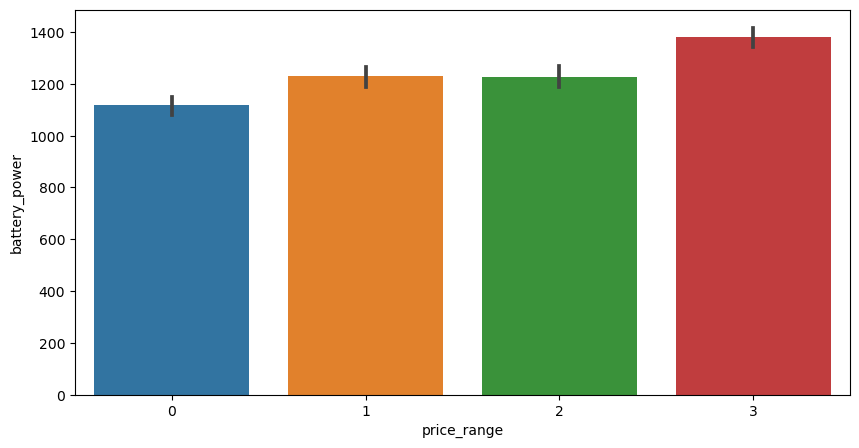

In [10]:
#relation between price_range & battery_power
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='price_range',y='battery_power')
plt.show()

#### Insights:
* price_range 3 has the good battery_power, we can say that they are costlier having a max battery_power.
* price_range 0 has lower battery_power as compare to others

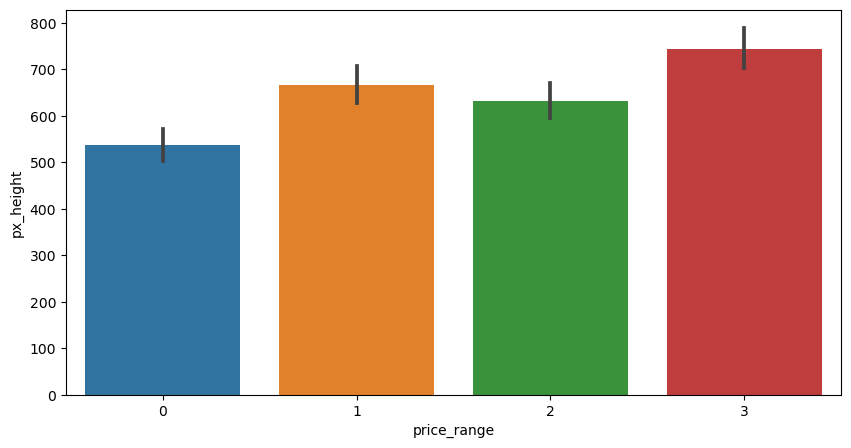

In [11]:
#relation between price_range and pixel height
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='price_range',y='px_height')
plt.show()

#### Insights:
* pixel_height above the 700 having price_range more
* price_range 0 having the lower px_height which is below 550

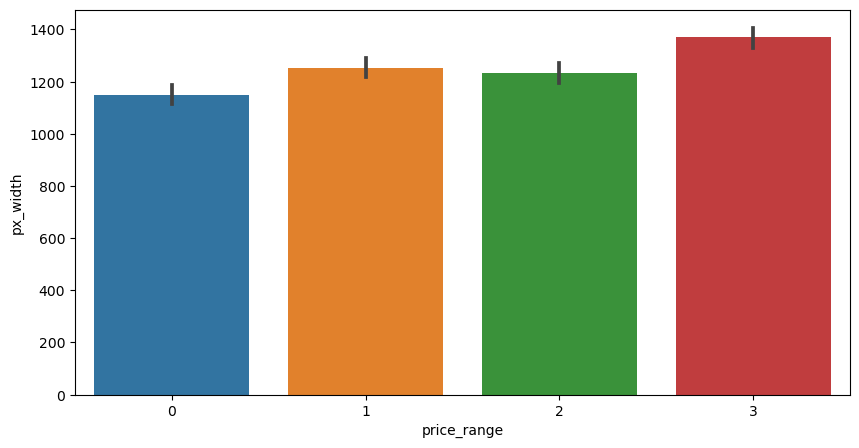

In [12]:
#relation between price_range and pixel width
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='price_range',y='px_width')
plt.show()

#### Insights:
*  the max px_width have the more price_range
* and below 1200 px_width have the 0 price_range


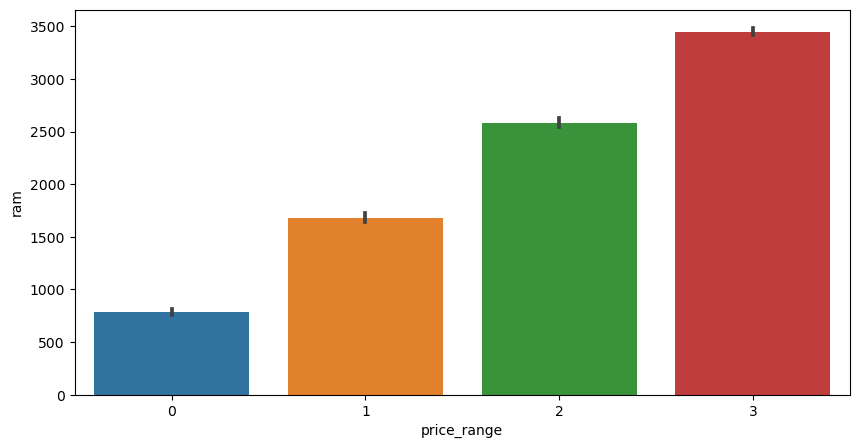

In [13]:
#relation between price_range and ram
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='price_range',y='ram')
plt.show()


#### Insights:
* price_range 3 has the highest ram and below ram 800 has the lowest price_range

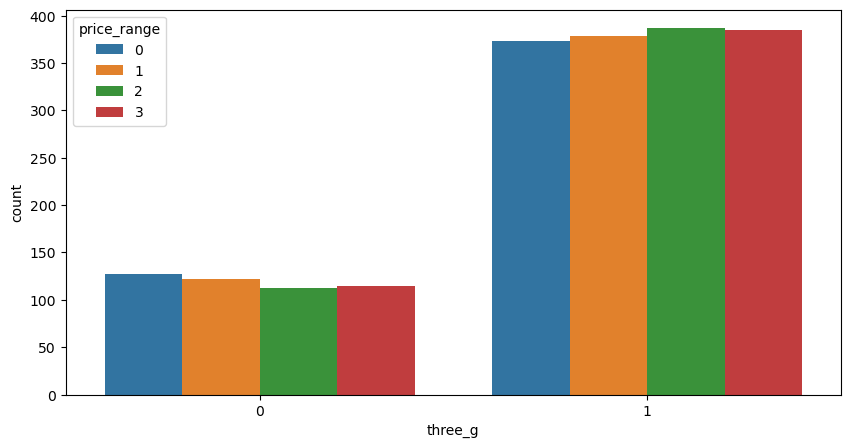

In [14]:
#relation between price_range and three_g
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='three_g',hue='price_range')
plt.show()


#### Insights:
* We can see here, there are three_g mobiles max(1) have and in that 2nd price_range have max three_g facilities
* we can assume that four_g mobiles used 3rd price_range more

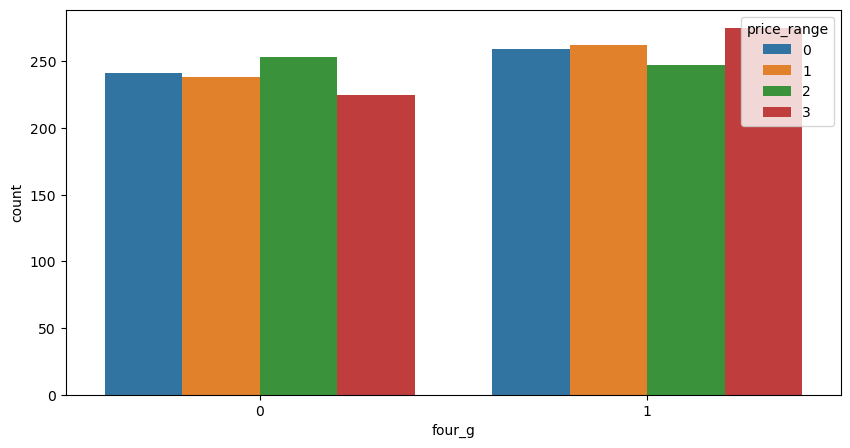

In [15]:
#relation between price_range and 3g
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='four_g',hue='price_range')
plt.show()

#### Insights:
* We can see here mobiles have the four_g facilities more and in that 3rd category price_range uses max 

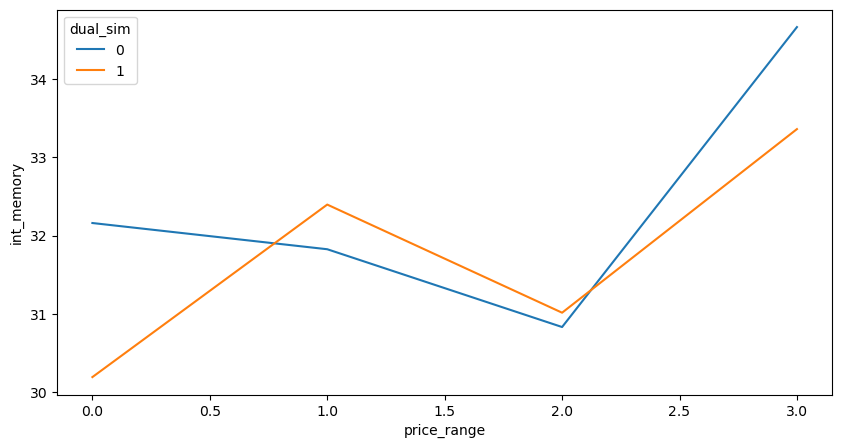

In [16]:
#relation between price range and memory
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='price_range',y="int_memory",hue='dual_sim',ci=None)
plt.show()

#### Insights:
* mobiles does not(0) having mobile dual_sims have good int_memory and there price_range is also more
* mobiles having(1) dual_sims have bad int_memory but there price_range is also in 3rd category

### Data Preprocessing 

In [17]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Insights:
* There is no features having the null values

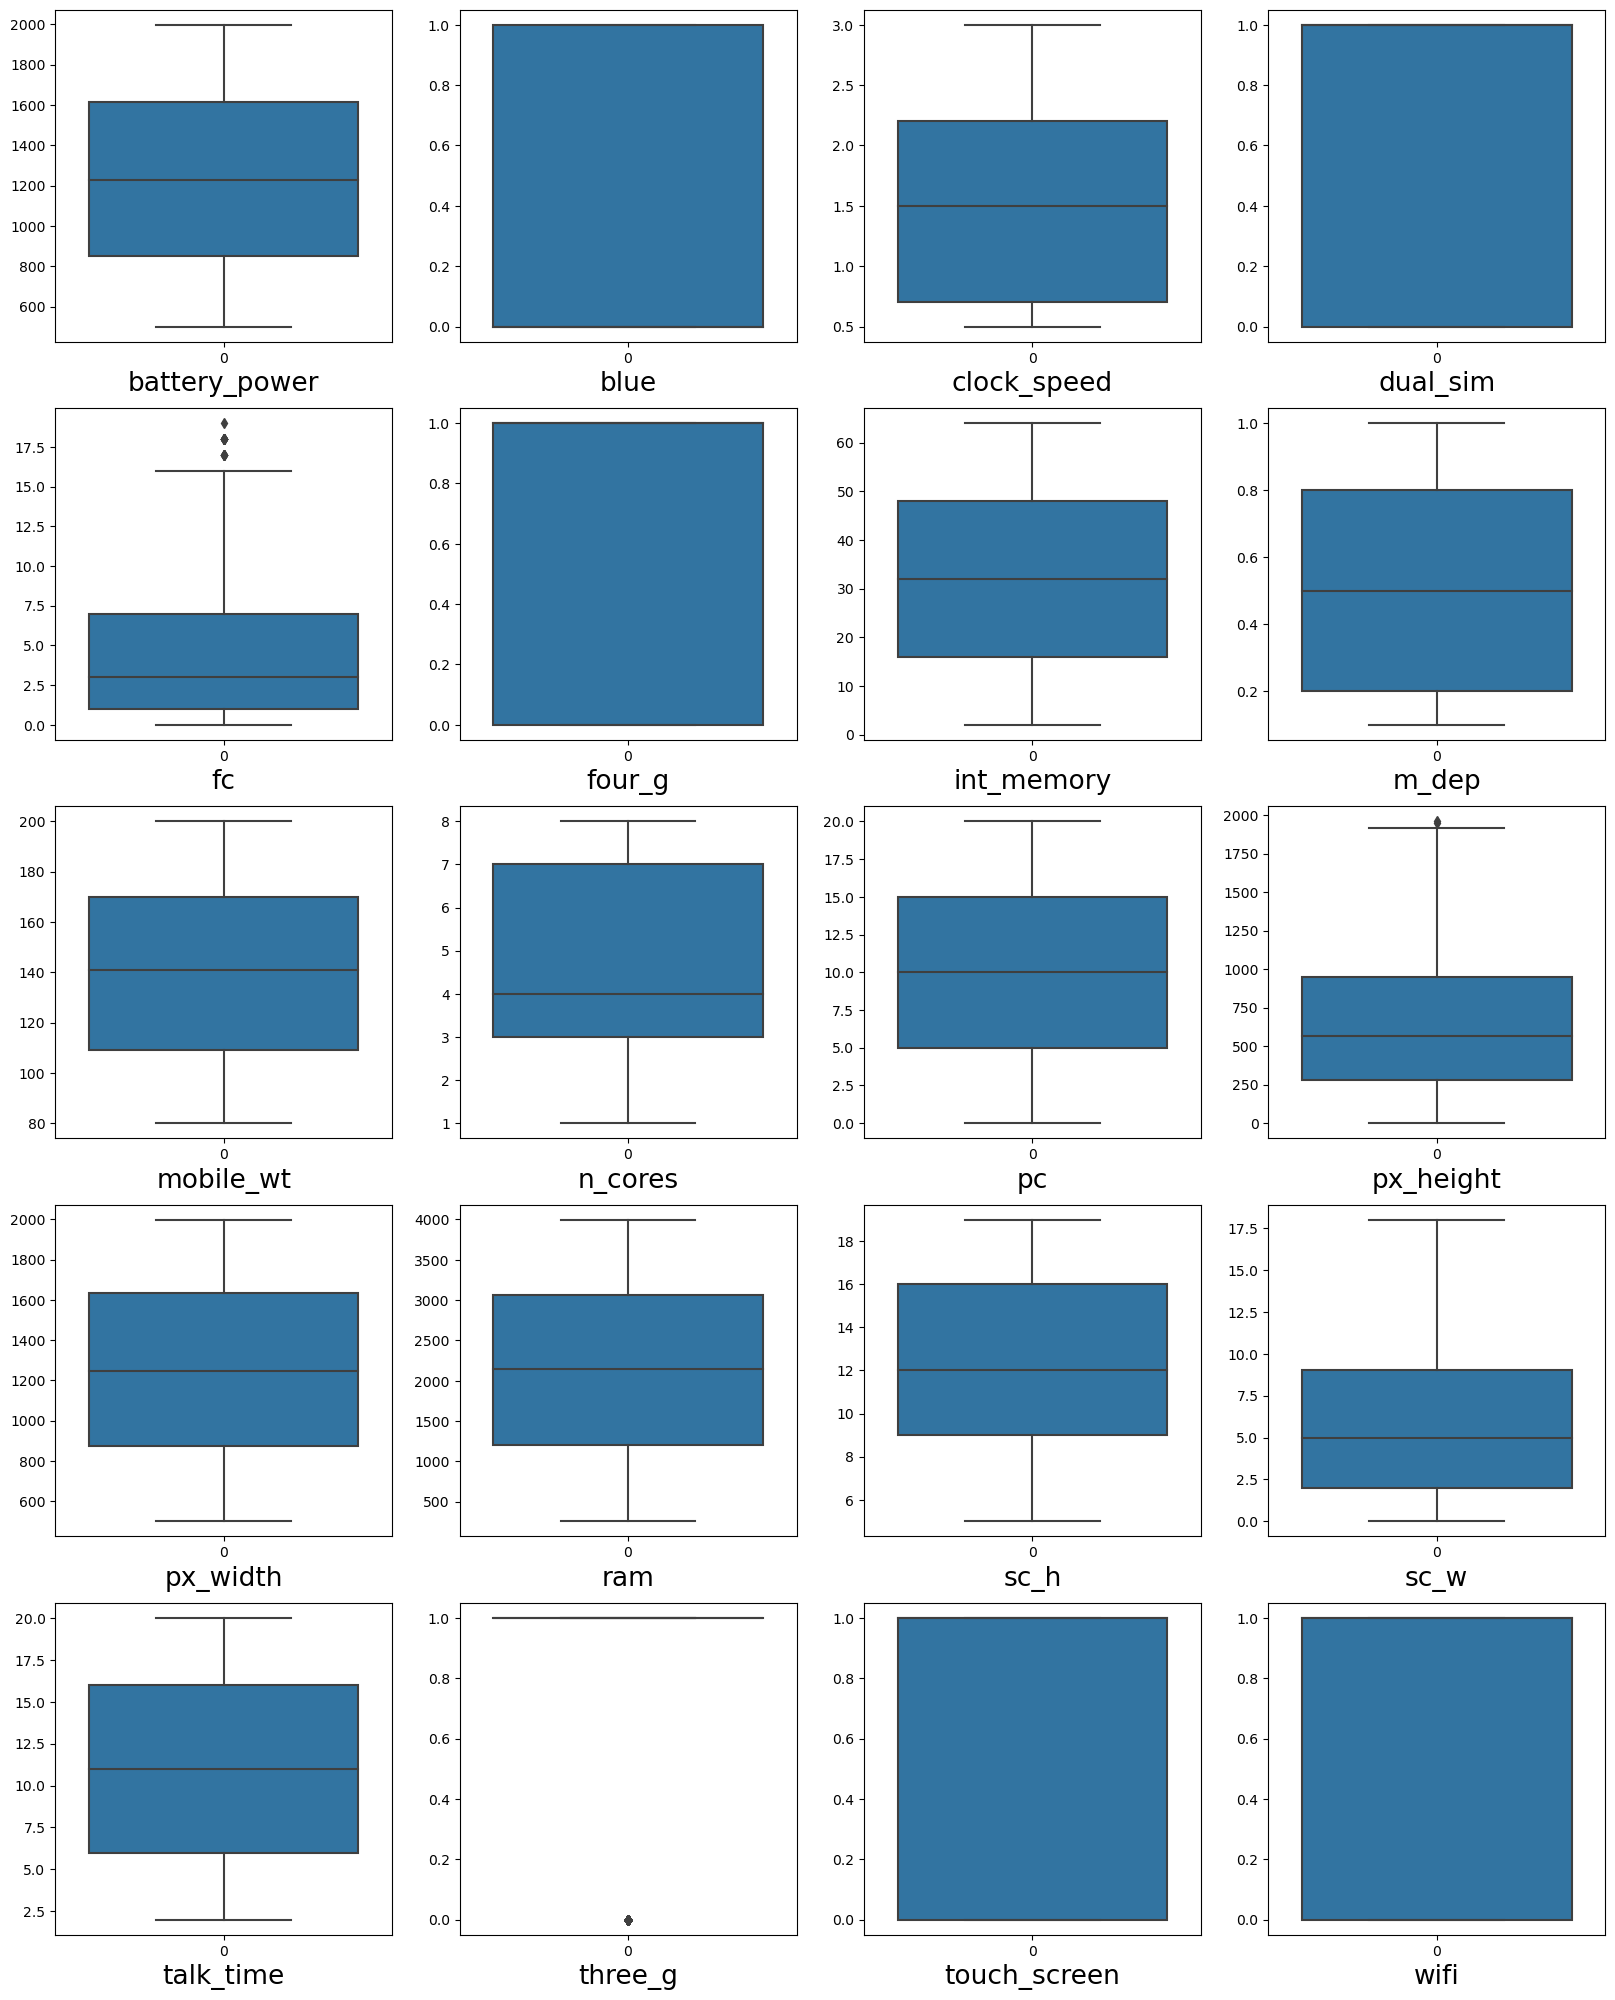

In [18]:
#checking outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber= 1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=19)
    plotnumber+=1
plt.show()
            
        


#### Insights:
* There are 3 outliers in fc 
* 1 outlier in three_g
* one outlier in px_height

<Axes: xlabel='three_g'>

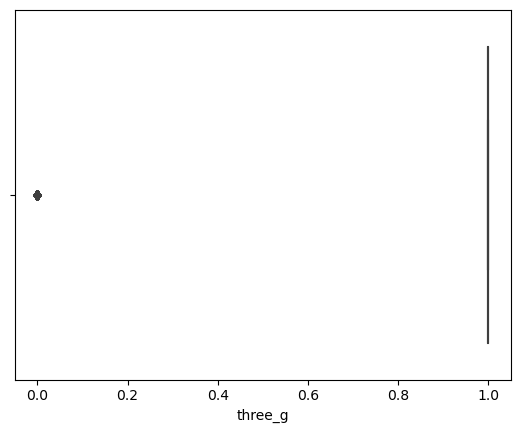

In [19]:
sns.boxplot(data=data,x='three_g')

In [20]:
#outlier treatment in three_g using IQR method
IQR = stats.iqr(data.three_g,interpolation='midpoint')
IQR

0.0

In [21]:
Q1=data.three_g.quantile(0.25)
Q3=data.three_g.quantile(0.75)
min_limit=Q1-1.5*(IQR)
max_limit=Q3+1.5*(IQR)
print(min_limit,max_limit)

1.0 1.0


In [22]:
data.loc[data['three_g']<min_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
19,682,1,0.5,0,4,0,19,1.0,121,4,...,902,1064,2337,11,1,18,0,1,1,1
22,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
30,1579,1,0.5,1,0,0,5,0.2,88,7,...,1358,1739,3532,17,11,12,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454,0,2.6,0,8,0,6,0.4,199,3,...,698,1018,1300,10,0,2,0,0,1,1
1982,1784,0,1.6,0,4,0,41,0.4,164,6,...,610,1437,2313,14,1,11,0,1,0,2
1983,1262,0,1.8,1,12,0,34,0.1,149,5,...,223,737,3248,13,3,4,0,1,1,2
1988,1547,1,2.9,0,2,0,57,0.4,114,1,...,347,957,1620,9,2,19,0,1,1,1


In [23]:
data.loc[data['three_g']>max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [24]:
data.loc[data['three_g']<min_limit,'three_g']=np.median(data.three_g)

In [25]:
data.loc[data['three_g']<min_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


<Axes: xlabel='three_g'>

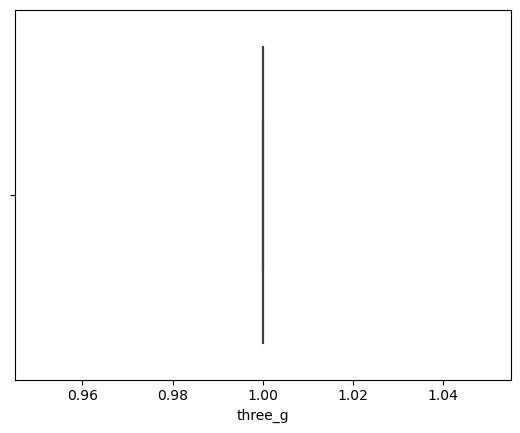

In [26]:
sns.boxplot(data=data,x='three_g')

In [27]:
#outlier treatment in fc using IQR method
IQR = stats.iqr(data.fc,interpolation='midpoint')
IQR

6.0

In [28]:
Q1=data.fc.quantile(0.25)
Q3=data.fc.quantile(0.75)
min_limit=Q1-1.5*(IQR)
max_limit=Q3+1.5*(IQR)
print(min_limit,max_limit)

-8.0 16.0


In [29]:
data.loc[data['fc']<min_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [30]:
data.loc[data['fc']>max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,...,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,...,954,1200,2766,7,2,7,1,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,...,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,...,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,...,1698,1771,3720,15,7,4,1,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,1,1,0,1


In [31]:
data.loc[data['fc']>max_limit,'fc']=np.median(data.fc)
data.loc[data['fc']>max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


<Axes: xlabel='fc'>

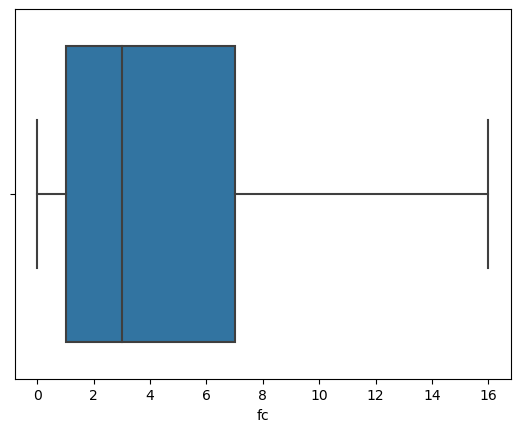

In [32]:
sns.boxplot(data=data,x='fc')

In [33]:
#outlier treatment in the px_height using IQR method
IQR = stats.iqr(data.px_height,interpolation='midpoint')
IQR

665.0

In [34]:
Q1 = data.px_height.quantile(0.25)
Q3 = data.px_height.quantile(0.75)
min_limit = Q1-1.5*(IQR)
max_limit = Q3+1.5*(IQR)
print(min_limit,max_limit)

-714.75 1944.75


In [35]:
data.loc[data['px_height']<min_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [36]:
data.loc[data['px_height']>max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,...,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,...,1960,1963,1622,18,17,16,1,1,1,2


In [37]:
data.loc[data['px_height']>max_limit,'px_height']=np.median(data.px_height)
data.loc[data['px_height']>max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


<Axes: xlabel='px_height'>

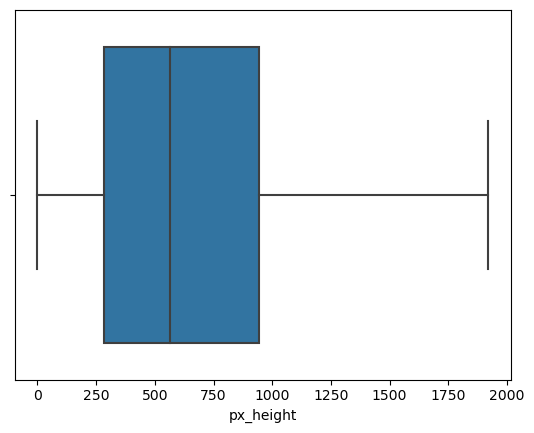

In [38]:
sns.boxplot(data=data,x='px_height')

#### Insights:
* we can see here handle all the outliers in three_g and fc and px_height 

<Axes: >

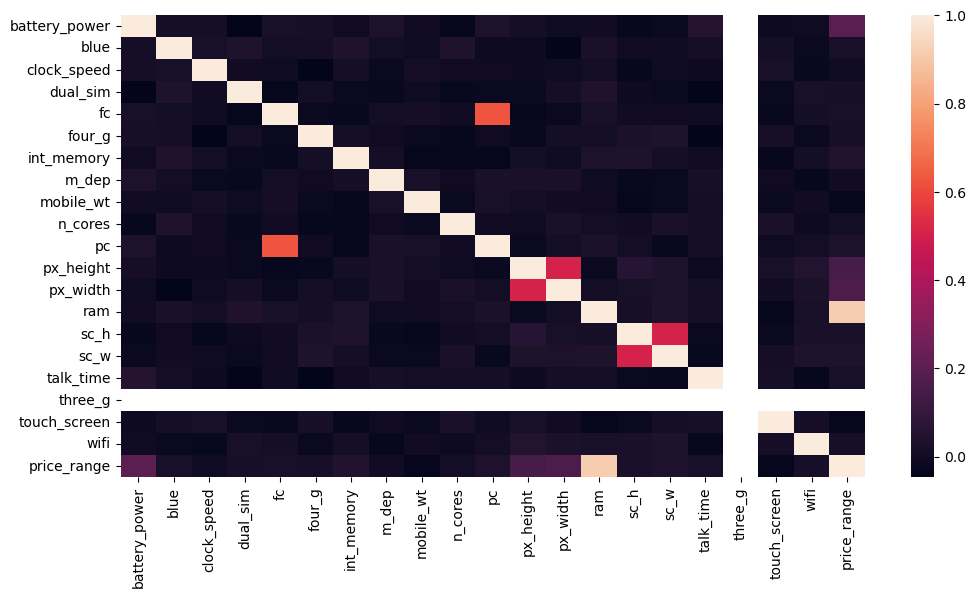

In [39]:
#checking the corelation 
plt.figure(figsize=(12,6))
sns.heatmap(data.corr())

#### Insights:
* Here pc vs fc have high correlation

In [40]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.018896,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014374,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,NaN,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003560,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.010082,-0.041533,0.026351,-0.002952,0.000613,0.013934,NaN,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.006880,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.012773,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,NaN,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.033595,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020894,0.014291,0.041072,-0.011949,-0.016666,-0.039404,NaN,-0.017117,0.022740,0.017444
fc,0.018896,0.003560,-0.006880,-0.033595,1.000000,-0.019929,-0.025671,0.004464,0.013453,-0.001489,...,-0.029087,-0.014033,0.019830,0.000701,-0.002200,-0.008712,NaN,-0.025563,0.010491,0.020479
four_g,0.015665,0.013443,-0.043073,0.003187,-0.019929,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.022336,0.007448,0.007313,0.027166,0.037005,-0.046628,NaN,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.025671,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.007978,-0.008335,0.032813,0.037771,0.011731,-0.002790,NaN,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,0.004464,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.024840,0.023566,-0.009434,-0.025348,-0.018388,0.017003,NaN,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.013453,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.003855,0.000090,-0.002581,-0.033855,-0.020761,0.006209,NaN,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.001489,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.008944,0.024480,0.004868,-0.000315,0.025826,0.013148,NaN,0.023774,-0.009964,0.004399


#### Insights:
* price_range having good relation with battery_power and also with ram

In [41]:
#data.drop(['fc'],axis=1, inplace=True) #already deleted fc


In [42]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,1,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Model Building

In [46]:
x = data.drop(columns = ['price_range']) #independant variable
y = data['price_range'] #dependant variable 
y.shape
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,1,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [51]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score

In [52]:
sc.fit_transform(x_train,y_train)

array([[-0.90893609,  1.01149463, -1.16524008, ...,  0.        ,
        -0.98722446,  0.98159786],
       [ 0.42822183,  1.01149463,  1.65523128, ...,  0.        ,
        -0.98722446, -1.01874713],
       [-0.84784765,  1.01149463, -0.30683575, ...,  0.        ,
         1.01294087,  0.98159786],
       ...,
       [-0.10121125, -0.98863599,  0.55156858, ...,  0.        ,
        -0.98722446,  0.98159786],
       [-0.09894872, -0.98863599,  1.04208533, ...,  0.        ,
         1.01294087,  0.98159786],
       [-1.19627797, -0.98863599, -1.28786926, ...,  0.        ,
        -0.98722446,  0.98159786]])

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [55]:
lr.score(x_test,y_test)

0.6366666666666667

In [59]:
y_pred1 = lr.predict(x_test)
y_pred1

array([3, 0, 2, 1, 3, 0, 0, 2, 2, 2, 1, 3, 1, 1, 2, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 2, 0, 1, 1, 2, 3, 0, 0, 3, 2, 3, 3, 3, 3,
       2, 2, 0, 1, 3, 1, 0, 2, 0, 3, 0, 3, 3, 1, 0, 3, 3, 2, 2, 1, 1, 3,
       3, 3, 2, 2, 3, 2, 1, 0, 1, 3, 3, 1, 1, 1, 3, 1, 3, 0, 0, 0, 1, 0,
       1, 3, 1, 2, 1, 0, 0, 3, 2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 3, 2, 3, 3,
       2, 0, 0, 2, 3, 3, 1, 0, 1, 0, 0, 3, 2, 2, 1, 2, 0, 1, 0, 3, 1, 3,
       3, 2, 3, 3, 3, 3, 0, 1, 1, 3, 2, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 2, 2, 1, 3, 3, 3, 3, 0, 1, 3, 2, 1, 3, 3, 0,
       1, 1, 3, 0, 3, 1, 0, 1, 3, 1, 2, 0, 3, 3, 3, 3, 1, 1, 2, 1, 0, 3,
       2, 0, 3, 3, 3, 0, 1, 3, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 3, 0, 0, 3, 3, 2, 2, 0, 3, 1, 0, 0, 3, 2, 0, 3, 2, 0, 0, 0, 3,
       3, 2, 0, 0, 2, 3, 3, 1, 3, 0, 2, 1, 1, 0, 1, 2, 3, 2, 0, 0, 1, 3,
       3, 3, 2, 3, 3, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0,
       1, 3, 3, 3, 0, 1, 2, 0, 2, 2, 3, 0, 1, 0, 1,

In [60]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       151
           1       0.53      0.56      0.54       135
           2       0.46      0.43      0.45       151
           3       0.68      0.73      0.71       163

    accuracy                           0.64       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.64      0.64      0.64       600



### KNN

In [62]:
from sklearn.neighbors import  KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [63]:
knn.score(x_test,y_test)

0.935

In [68]:
y_pred2 = knn.predict(x_test)
y_pred2

array([3, 0, 2, 2, 2, 0, 0, 2, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 2, 3, 3, 3, 0, 0, 0, 2, 0,
       2, 3, 1, 2, 2, 1, 0, 3, 2, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 0, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 3, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [69]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       151
           1       0.94      0.90      0.92       135
           2       0.91      0.91      0.91       151
           3       0.96      0.93      0.94       163

    accuracy                           0.94       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.94      0.94      0.93       600



### SVC

In [71]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)
y_pred3 = svc.predict(x_test)

In [72]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [73]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1, kernel='poly')


In [75]:
grid_pred = grid.predict(x_test)

In [76]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       151
           1       0.95      0.93      0.94       135
           2       0.95      0.95      0.95       151
           3       0.99      0.98      0.98       163

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [100]:
svc.score(x_test,y_test)

0.9466666666666667

### Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
dtc.score(x_test,y_test)

0.8316666666666667

In [81]:
y_pred4 = dtc.predict(x_test)
y_pred4

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 1, 1, 0, 0,
       3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 2, 0, 2, 3, 0, 1, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 2, 1, 1, 3, 0, 3, 0, 2, 3, 1, 0, 3, 3, 1, 2, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 2, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 3, 3, 0, 0, 3, 3, 3, 0, 3, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3,
       3, 0, 0, 2, 2, 3, 0, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 2, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 1, 2, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 3, 1, 3, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       1, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 3, 2, 3, 2, 0, 2, 0, 0, 0, 3, 3, 1, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 1, 3, 3, 2, 2, 3, 3, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       3, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [82]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       151
           1       0.75      0.79      0.77       135
           2       0.76      0.72      0.74       151
           3       0.88      0.89      0.88       163

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



### XGBOOST

In [84]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [85]:
xgb.score(x_test,y_test)

0.915

In [87]:
y_pred5 = xgb.predict(x_test)
y_pred5

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 1, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 3, 3, 1, 0, 3, 3, 3, 0, 3, 1, 2, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [88]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       151
           1       0.89      0.90      0.90       135
           2       0.88      0.84      0.86       151
           3       0.93      0.93      0.93       163

    accuracy                           0.92       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.92      0.91       600



### Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [91]:
rfc.score(x_test,y_test)

0.8766666666666667

In [92]:
y_pred6 = rfc.predict(x_test)
y_pred6

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2, 1, 3,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 3, 1, 0, 3, 3, 3, 0, 3, 1, 2, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 1, 0, 1, 1, 2, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       1, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       1, 0, 3, 3, 3, 1, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 1, 2, 3, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [93]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       151
           1       0.79      0.82      0.80       135
           2       0.83      0.77      0.80       151
           3       0.93      0.94      0.94       163

    accuracy                           0.88       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.88      0.88      0.88       600



### Conclusion:

******we can see here From svc we are getting highest accuracy with better performance so, we will select svc as our final mode******